<a href="https://colab.research.google.com/github/FelipeBit/study-about-fake-news-detection-naive-bayes/blob/main/fakeNewsNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas é uma ferramenta de análise e manipulação de dados de código aberto
import pandas as pd
# Numpy É uma biblioteca Python que fornece um objeto de matriz multidimensional,
# vários objetos derivados e uma variedade de rotinas para operações rápidas
# em arrays, incluindo matemática, etc...
import numpy as np
# Matplotlib é uma biblioteca abrangente para criar gráficos estáticos, animados
# e interativos em Python.
import matplotlib.pyplot as plt
# Lib para expressões regulares
import re
# Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib
import seaborn as sns
# Lib utilizada para criar a word cloud
from wordcloud import WordCloud
# NLTK é uma plataforma para construir programas Python para trabalhar com
# dados de linguagem humana.
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Scikit-learn é uma biblioteca de aprendizado de máquina de software livre
# para Python
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Esta lib vai ser utilizada para remover contrações dos titulos
!pip install contractions
import contractions


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Importa csv com noticias verdadeiras
true = pd.read_csv("./drive/MyDrive/True.csv")
# Importa csv com noticias falsas
fake = pd.read_csv("./drive/MyDrive/Fake.csv")

# É criada a coluna isFake
# com o valor 0 (zero) para noticias verdadeiras e 1 (um) para falsas
true["isFake"] = 0
fake["isFake"] = 1

# Mescla o csv de noticias verdadeiras com o de noticias falsas
df = pd.concat([true, fake], axis=0)


In [ ]:

# Exibe resultado
df.head()

,title,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
# Verifica se temos registros nulos no dataset
df.isnull().sum()

title      0
text       0
subject    0
date       0
isFake     0
dtype: int64

Text(0.5, 1.0, 'Distribuição das noticias por assunto')

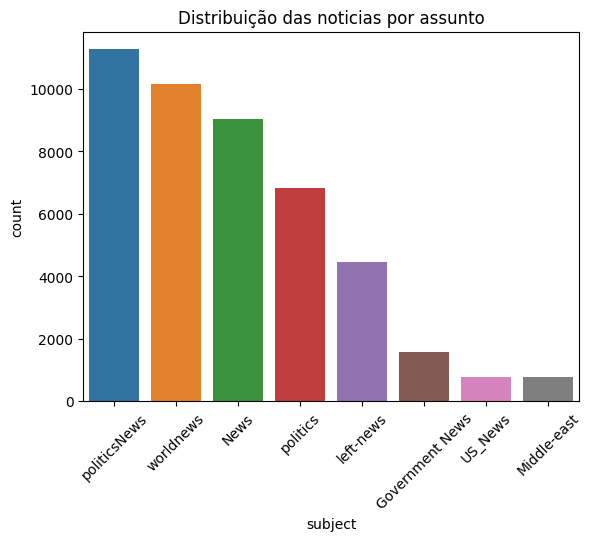

In [ ]:
# Apresenta gráfico com a quantidade de noticias por assunto
plot = sns.countplot(x="subject", data=df, order=df.subject.value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plot.set_title("Distribuição das noticias por assunto")

In [ ]:
# Apresenta a quantidade de noticias dentro de cada assunto
(df.subject.value_counts())

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

Text(0.5, 1.0, 'News distribution by fake/true')

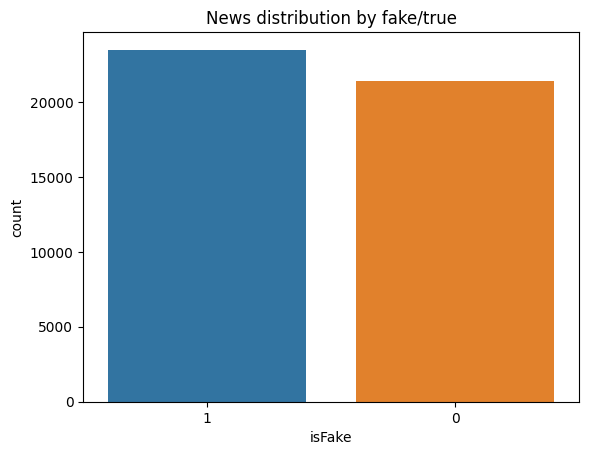

In [ ]:
# Este gráfico apresenta a quantidade de noticis falsas (UM) e verdadeiras (ZERO) contidas no dataset
sns.countplot(x="isFake", data=df, order=df.isFake.value_counts().index).set_title("News distribution by fake/true")

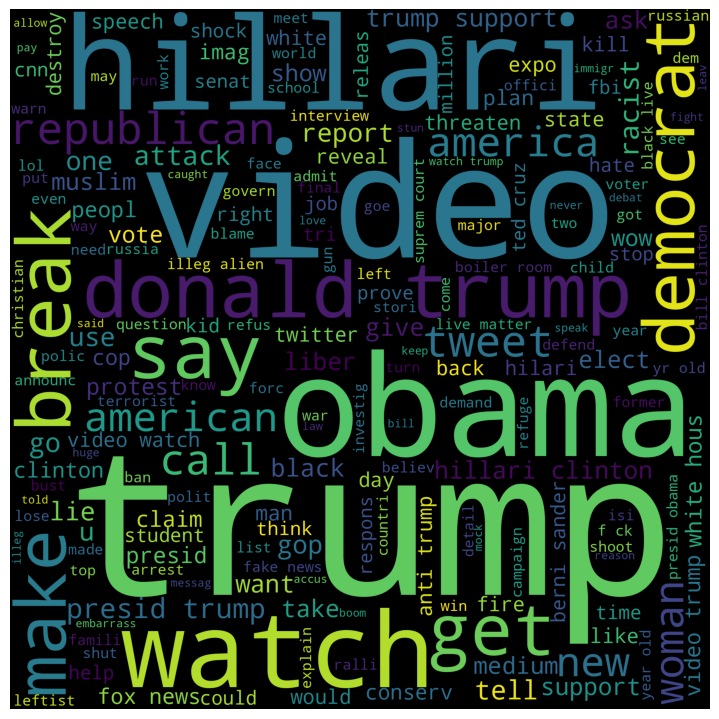

In [ ]:
# Apresenta um word cloud com as principais palavras contidas
# nos titulos das fake news
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

comment_words = ''
stopwords = set(stop_words)

for val in df[df['isFake']==1]['title']:

    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 2048, height = 2048,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
# Apresenta um word cloud com as principais palavras contidas
# nos titulos das noticias verdadeiras
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

comment_words = ''
stopwords = set(stop_words)

for val in df[df['isFake']==0]['title']:

    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 2048, height = 2048,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
# Importa a função lemming da lib nltk
from nltk.stem import WordNetLemmatizer
# Define objeto para lemmatização
lemmatizer = WordNetLemmatizer()

# Importa a função stemming da lib nltk
from nltk.stem.porter import PorterStemmer
# Define objeto para stemming
stemmer = PorterStemmer()

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Remove colunas que não serão utilizadas
df.drop(['text', 'subject', 'date'], axis=1, inplace=True)

def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_characters(text):
    return re.sub('[^a-zA-Z]', ' ', text)

def remove_url(text):
    return re.sub(r'http\S+', '', text)

def remove_contractions(text):
    return ' '.join([contractions.fix(word) for word in text.split()])

def remove_stopwords(text):
    return ' '.join([word for word in nltk.word_tokenize(text) if word not in stop_words])

def lemmatize_words(text):
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

def stemming_words(text):
    return ' '.join(stemmer.stem(word) for word in text.split())

def clean_text(text):
    text = remove_url(text)
    text = remove_contractions(text)
    text = text.lower()
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords(text)
    text = stemming_words(text)
    text = lemmatize_words(text)
    return text

# Aplica a função clean_text para todos os titles do arquivo
df['title'] = df['title'].apply(clean_text)
df.head()

,title,isFake
0,budget fight loom republican flip fiscal script,0
1,militari accept transgend recruit monday pentagon,0
2,senior republican senat let mr mueller job,0
3,fbi russia probe help australian diplomat tip nyt,0
4,trump want postal servic charg much amazon shi...,0


In [ ]:
x = np.array(df["title"])
y = np.array(df["isFake"])

# Converte uma coleção de documentos de texto em uma matriz de contagens de token
cv = CountVectorizer()
# Aprende o dicionário de vocabulário e retorna a matriz documento-termo.
x = cv.fit_transform(x)

# Divide em subsets de treino e teste randomicamente.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
# Classificador Naive Bayes para modelos multinomiais.
model = MultinomialNB()
# Fit do Classificador Naive Bayes de acordo com xtrain, ytrain.
result = model.fit(xtrain, ytrain)

# here
ypred = model.predict(xtest)

print(ypred)

# Retorna a precisão média nos dados de teste e rótulos fornecidos
# print(model.score(xtest, ytest))
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ytest, ypred)))

# Compare the train-set and test-set accuracy¶

ypred_train = model.predict(xtrain)

ypred_train

print('Training set accuracy score: {0:0.4f}'. format(accuracy_score(ytrain, ypred_train)))

# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(xtrain, ytrain)))

print('Test set score: {:.4f}'.format(model.score(xtest, ytest)))

# The training-set accuracy score is 0.9425 while the test-set accuracy to be 0.9318. These two values are quite comparable. So, there is no sign of overfitting.

[1 1 1 ... 1 0 0]
Model accuracy score: 0.9318
Training set accuracy score: 0.9425
Training set score: 0.9425
Test set score: 0.9318


Confusion matrix

 [[3952  378]
 [ 234 4416]]

True Positives(TP) =  3952

True Negatives(TN) =  4416

False Positives(FP) =  378

False Negatives(FN) =  234


<Axes: >

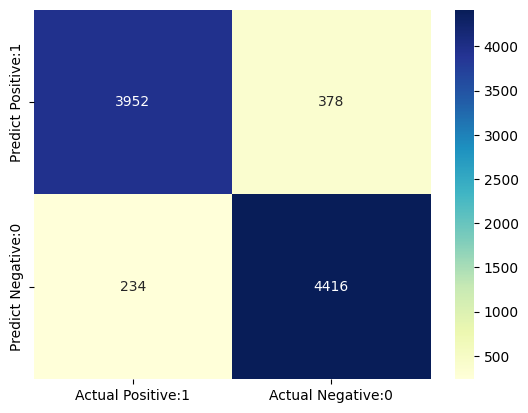

In [ ]:
# matriz de confusao
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, ypred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#classification method
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

TP = cm[0,0] # true positive
TN = cm[1,1] # true negative
FP = cm[0,1] # false positive
FN = cm[1,0] # false negative

# acuracia
metric_accuracy = (TP + TN) / (TP + TN + FP + FN)
print('Acurácia : {0:0.4f}'.format(metric_accuracy))

# precisao
metric_precision = (TP) / (TP + FP)
print('Precisão : {0:0.4f}'.format(metric_precision))

# recall
metric_recall = (TP) / (TP + FN)
print('Revocação : {0:0.4f}'.format(metric_recall))

# f1-score
metric_f1score = (2 * metric_precision * metric_recall)  / (metric_precision + metric_recall)
print('F-1 score : {0:0.4f}'.format(metric_f1score))


              precision    recall  f1-score   support

           0       0.94      0.91      0.93      4330
           1       0.92      0.95      0.94      4650

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

Acurácia : 0.9318
Precisão : 0.9127
Revocação : 0.9441
F-1 score : 0.9281


In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

# print recall

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

# true positive

true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

# false positive

false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

#specificity

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

In [ ]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, xtrain, ytrain, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.92900891 0.93485523 0.93429844 0.92371938 0.92900891 0.92344098
 0.9298441  0.92900891 0.93010304 0.93400167]


In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9297


In [ ]:
def showResult(data):
  # Executa a classificação em uma matriz de vetores
  result = model.predict(data)
  fakeMessage = "Alert! this news may be FAKE, please check the veracity in reliable sources."
  realMessage = "Possibly this news is TRUE but we always recommend to check the veracity in reliable sources."
  message = fakeMessage if result[0]==1 else realMessage
  return message

In [ ]:
news_headline = "Supreme Court says House January 6 committee can get Kelli Ward’s phone and text records"
df = cv.transform([clean_text(news_headline)]).toarray()
print(showResult(df))

Possibly this news is TRUE but we always recommend checking the veracity of the news on trusted sites.


In [ ]:
news_headline = "This is a fake news"
df = cv.transform([clean_text(news_headline)]).toarray()
print(showResult(df))

Alert! this news may be FAKE, check on trusted sites to verify the veracity of this news.
